In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

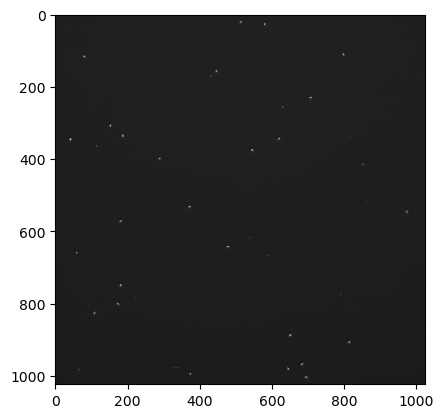

In [2]:
videofile = "ExampleVideos/10X Ph- 9Fps Wash Dil 1 16 P017me R1.mp4"
#videofile = "ExampleVideos/10X_-ph_9fps_R1.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

### Feed through the tracking pipeline

In [89]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)

#f = tracker.determineCentroids_simple(frames,method="global",global_thresh=50)
#f = tracker.determineCentroids_simple(frames,method="median")
#f = tracker.determineCentroids_morphology(frames,kernel_size=(1,1))

#f = tracker.determineCentroids_simple(frames,method="otsu")
f = tracker.determineCentroids(frames)

Frame 263: 30 features


In [90]:
importlib.reload(tracker)

t = tracker.trackCentroids(f,search_range=21)

print(t.head())

compute_segments = False
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

Frame 263: 30 trajectories present.
             y           x         mass      size       ecc      signal  \
0    21.650133  513.683791  1391.458420  2.240026  0.017334   65.320900   
1  1004.514689  694.497211  1657.055665  2.206182  0.165244   89.970296   
2   995.425473  374.185048  1335.381044  1.747699  0.232163  120.782042   
3   981.399024  644.957958  1641.649793  1.903943  0.152119  130.641800   
4   968.693625  683.107832  1691.564820  1.965365  0.294867  129.409330   

   raw_mass        ep  frame  sperm  
0    5636.0  0.009949      0      0  
1    5819.0  0.009400      0      1  
2    4705.0  0.014150      0      2  
3    5311.0  0.011099      0      3  
4    5544.0  0.010249      0      4  
             y           x         mass      size       ecc      signal  \
0    21.650133  513.683791  1391.458420  2.240026  0.017334   65.320900   
1  1004.514689  694.497211  1657.055665  2.206182  0.165244   89.970296   
2   995.425473  374.185048  1335.381044  1.747699  0.232163 

In [52]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Visualization

In [91]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, final, visualization="flow")

(69, 3)
Video Finished.
